# Bank Marketing  [銀行營銷-分類練習]

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

[數據與葡萄牙銀行機構的直接營銷活動有關。市場營銷活動基於電話。通常，需要訪問同一個客戶的多個聯繫人，以便訪問產品（銀行定期存款）是（“是”）還是不（“否”）訂閱。]

There are four datasets: 

* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).





# Attribute Information:

## Input variables:

### bank client data:

* 1 - age（年齡） 
* 2 - job （工作）: type of job 
* 3 - marital（婚姻狀況） : marital status 
* 4 - education（教育程度） 
* 5 - default(違約): has credit in default? 
* 6 - housing（房貸）: has housing loan? 
* 7 - loan（個人貸款）: has personal loan? 
* 8 - balance (個人存款餘額)

### related with the last contact of the current campaign:

* 9 - contact（通話方式）: contact communication type 
* 10 - month（最後通話時間-月份）: last contact month of year
* 11 - day_of_week（最後通話的星期）: last contact day of the week 
* 12 - duration（最後通話的秒數）: last contact duration, in seconds 
#### Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

[重要說明：此屬性會嚴重影響輸出目標（例如，如果duration = 0，則y ='no'）。然而，在執行呼叫之前，持續時間是未知的。同樣，在通話結束後，y顯然是已知的。因此，此輸入僅應出於基準目的而包括在內，如果要使用一個現實的預測]

### other attributes:

* 13 - campaign（營銷期間的通話次數）: number of contacts performed during this campaign and for this client (includes last contact)
* 14 - pdays（營銷後聯絡的次數）: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 15 - previous（營銷之前的聯絡次數）: number of contacts performed before this campaign and for this client 
* 16 - poutcome(之前營銷的結果): outcome of the previous marketing campaign 



## Output variable (desired target):

* 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')





## Categorical Variable :

* Marital - (Married , Single , Divorced)
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* Default - (Yes/No)

## Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from prettytable import PrettyTable
import prettytable as pt
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,StandardScaler, label_binarize,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import  SMOTE
from sklearn import metrics as m
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,roc_curve,auc,confusion_matrix,roc_auc_score

In [2]:
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
import tensorflow as tf
from tensorflow.keras import layers, Input

In [3]:
def load_data():
    
    #載入資料
    data=pd.read_csv("bank-full.csv",sep=";",header='infer')
    data=data.drop(['duration'],axis=1)
    data.y.replace(('yes','no'),(1,0),inplace=True)
    
    # 正歸化
    col_names=['age','balance','day','campaign','pdays','previous']
    features=data[col_names]
    normalizer=Normalizer(norm="max")
    features=normalizer.fit_transform(features.values)
    data[col_names]=features
    
    #類別資料編碼
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                       (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    
    le = LabelEncoder()
    data.job = le.fit_transform(data.job)
    data.poutcome = le.fit_transform(data.poutcome)
    data.default=le.fit_transform(data.default)
    data.housing=le.fit_transform(data.housing)
    data.loan=le.fit_transform(data.loan)
    data.marital=le.fit_transform(data.marital)
    data.contact=le.fit_transform(data.contact)
    data.month=le.fit_transform(data.month)
    data.education=le.fit_transform(data.education)
    
    return data

In [4]:
def roc_curve_(x_tr,y_tr,x_te,y_te,y_pre,i):  
    fpr,tpr,thresholds=roc_curve(y_te,y_pre)
    print("ROC:",auc(fpr,tpr))
    plt.figure(figsize=(8,8))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    plt.title("ROC curve")
    plt.legend([i+'(AUC:%.2f)' %auc(fpr,tpr),],loc='best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [5]:
def evaluation(x_tr,y_tr,x_te,y_te,y_pre,i):
    
    ## confusion matrix
    print('confusion matrix')
    print()
    matrix=confusion_matrix(y_te, y_pre)
    table1 = pt.PrettyTable()
    table1.field_names=['','判斷為陰性','判斷為陽性']
    table1.add_row( ["實際上為陰性", matrix[0][0],matrix[0][1]] )
    table1.add_row( ["實際上為陽性", matrix[1][0],matrix[1][1]] )
    table1.align = 'c'
    table1.set_style(pt.PLAIN_COLUMNS)
    print(table1)
    print('----------------------------------------------------------')
    
    #分類度量
    print(' ')
    print('分類度量')
    f1=f1_score(y_te, y_pre,average='binary')
    recall=recall_score(y_te, y_pre,average='binary')
    precision=precision_score(y_te, y_pre,average='binary')
    table2 = pt.PrettyTable()
    table2.field_names=['',' ']
    table2.add_row( ["f1 score:", f1.round(3)])
    table2.add_row( ["recall score:", recall.round(3)])
    table2.add_row( ["precision score", precision.round(3)])
    table2.align = 'r'
    table2.set_style(pt.PLAIN_COLUMNS)
    print(table2)
    print('----------------------------------------------------------')
    
    #ROC curve
    print(' ')
    fpr,tpr,thresholds=roc_curve(y_te,y_pre)
    print("ROC:",auc(fpr,tpr))
    plt.figure(figsize=(15,10))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    plt.title("ROC curve",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend([i+'(AUC:%.2f)' %auc(fpr,tpr),],loc='best',fontsize=20)
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.show()
    

## 載入資料

In [6]:
data=pd.read_csv("bank-full.csv",sep=";",header='infer')

In [7]:
def df_interact(df, nrows=10, ncols=18):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
         return df.iloc[row:row + nrows, col:col + ncols]
    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols) if len(df.columns) > ncols else fixed(0))

    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(data)

interactive(children=(IntSlider(value=0, description='row', max=45211, step=10), Output()), _dom_classes=('wid…

(45211 rows, 17 columns) total


## 資料參數繪圖

In [13]:
data1 = data[data['y'] == 'yes']
data2 = data[data['y'] == 'no']

no     39922
yes     5289
Name: y, dtype: int64


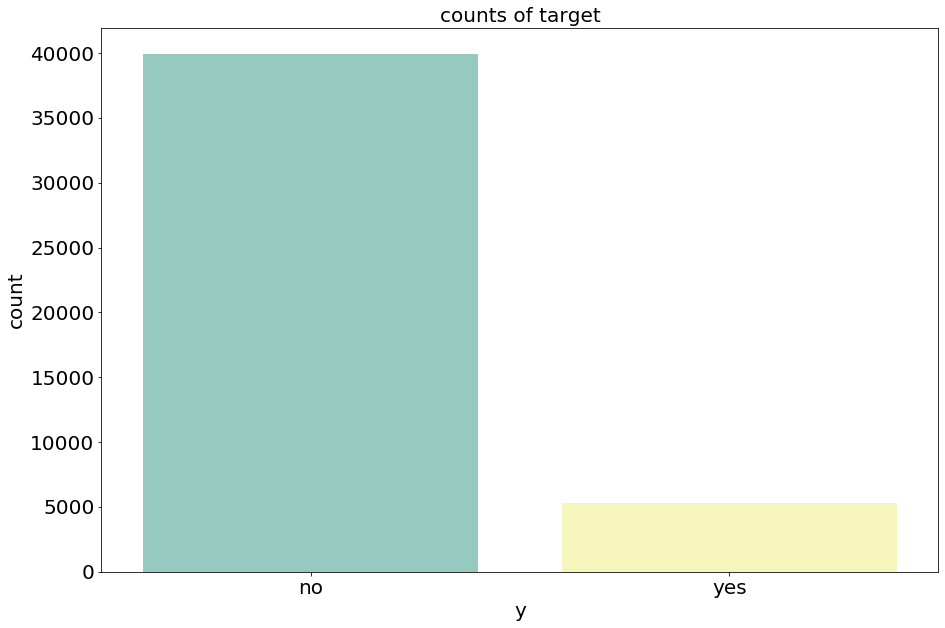

In [21]:
print(data.y.value_counts())
plt.figure(figsize=(15,10))
sns.countplot(x='y', data=data,palette='Set3',dodge=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('y',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('counts of target', fontsize=20)
plt.savefig('target')

資料類別不平均，需要做資料增量的特徵工程

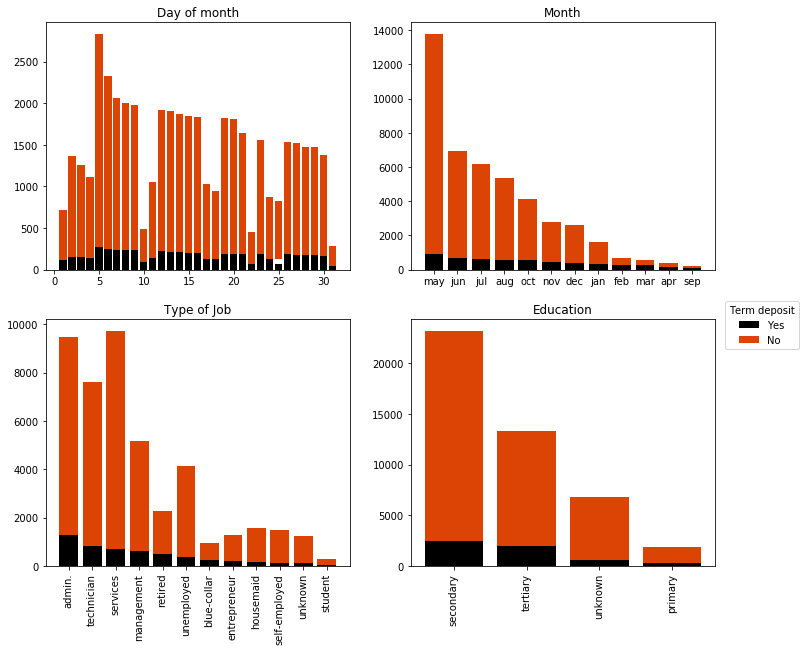

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day'].unique(),height = data1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day'].unique(),height = data2['day'].value_counts(),bottom = data1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of month')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()
plt.savefig('category 1')

In [ ]:
plt.bar(X, Y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.35, Y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)


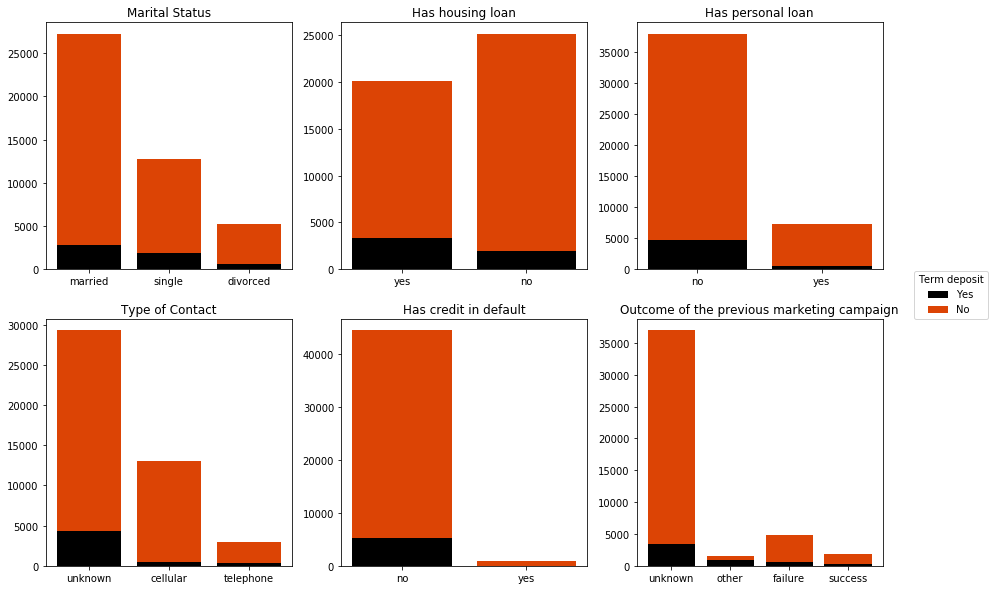

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()
plt.savefig('category 2')

### 類別資料的卡方檢定

* 虛無假設是：兩個變數(類別資料與y)呈統計獨立性

In [38]:
import prettytable as pt
from scipy.stats import chisquare
categorical_variable=['marital','job','contact','education','month','poutcome',
                      'housing','loan','default']
table1 = pt.PrettyTable()
table1.field_names=['categorical variable','statistics','p value']
table1.align = 'l'

y_no=data['y']=="no"
data_y_no=data[y_no]
total_y=data.y.value_counts()
a=total_y[0]+total_y[1]

for i in categorical_variable:
    total=data_y_no[i].value_counts()
    Observed = total
    Expected = (data[i].value_counts()*total_y[0]/(a.sum())).round(2)
    stat, pval = chisquare(Observed, Expected)
    table1.add_row( [i, stat,pval])
    
print(table1)

+----------------------+--------------------+------------------------+
| categorical variable | statistics         | p value                |
+----------------------+--------------------+------------------------+
| marital              | 22.98656383110704  | 1.0198377534681978e-05 |
| job                  | 94.85672365738375  | 1.852354065667773e-15  |
| contact              | 121.16235455784002 | 4.896987557713532e-27  |
| education            | 27.950569381723607 | 3.7198473180991226e-06 |
| month                | 358.1983489619531  | 4.459325828485052e-70  |
| poutcome             | 513.7431298227674  | 5.014790276578564e-111 |
| housing              | 102.443235753097   | 4.439068499303657e-24  |
| loan                 | 24.589900622285082 | 7.092246308357823e-07  |
| default              | 2.6579741249367763 | 0.10303188591866443    |
+----------------------+--------------------+------------------------+


* 只有違約紀錄與是否訂閱呈統計獨立性 (p-value>0.05)
* 其他單一變數與y呈統計相關性

Text(0.5, 1.0, 'counts of age')

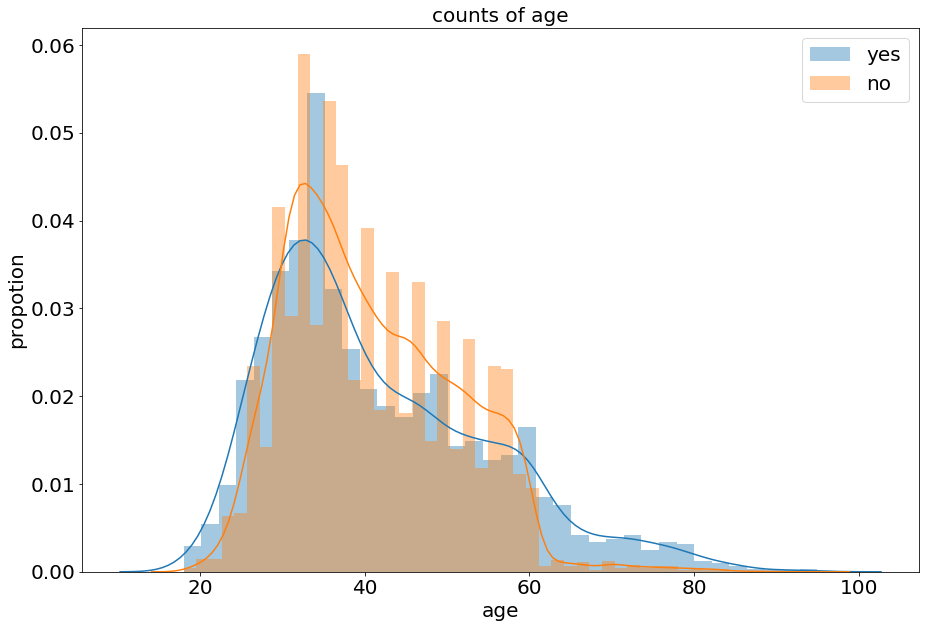

In [39]:
plt.figure(figsize=(15,10))
numerical_variable=['age','balance','day','duration','campaign','pdays','previous']

sns.distplot(data1['age'],kde=True)
sns.distplot(data2['age'],kde=True)
plt.legend(['yes','no'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('age',fontsize=20)
plt.ylabel('propotion',fontsize=20)
plt.title('counts of age', fontsize=20)

Text(0.5, 1.0, 'counts of day')

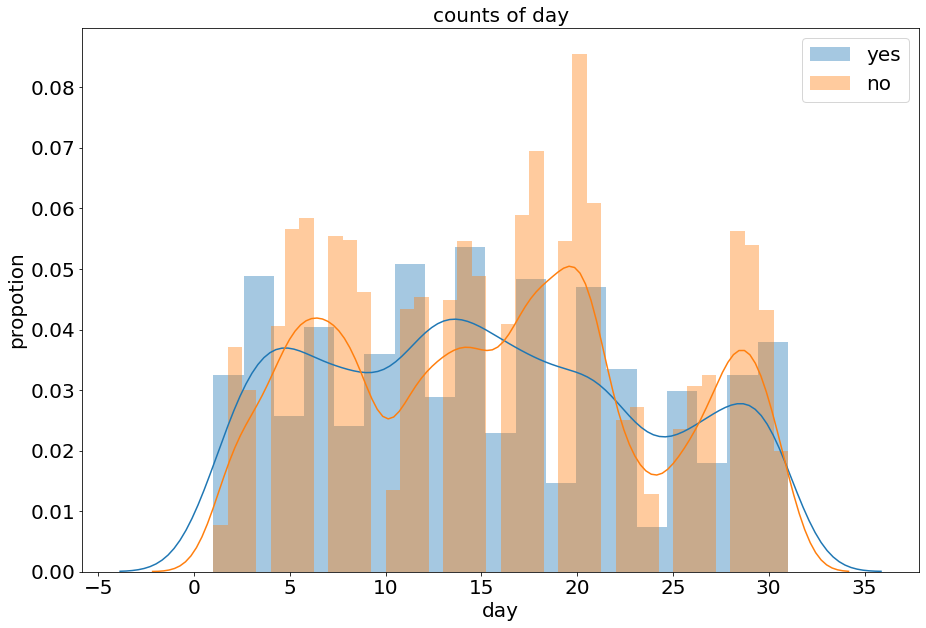

In [40]:
plt.figure(figsize=(15,10))
sns.distplot(data1['day'],kde=True)
sns.distplot(data2['day'],kde=True)
plt.legend(['yes','no'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('day',fontsize=20)
plt.ylabel('propotion',fontsize=20)
plt.title('counts of day', fontsize=20)

Text(0.5, 1.0, 'counts of duration')

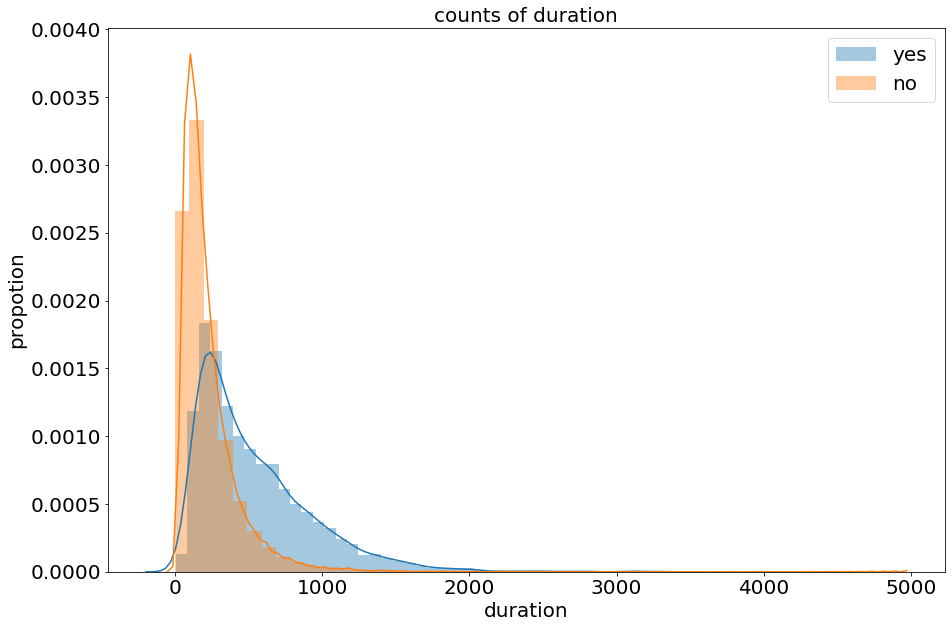

In [41]:
plt.figure(figsize=(15,10))
sns.distplot(data1['duration'],kde=True)
sns.distplot(data2['duration'],kde=True)
plt.legend(['yes','no'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('duration',fontsize=20)
plt.ylabel('propotion',fontsize=20)
plt.title('counts of duration', fontsize=20)

* 我們用KDE(Kernal Density Estimates)去擬合機率分配的估計(長條圖)

* 當年紀大過60歲的客戶願意訂閱產品
* 與客戶最後通話的秒數越高，越有機會訂閱產品，當客戶通話秒數為0，代表客戶不願意訂閱產品
* 每個月幾號與客戶通話似乎跟是否訂閱產品沒有直接關聯

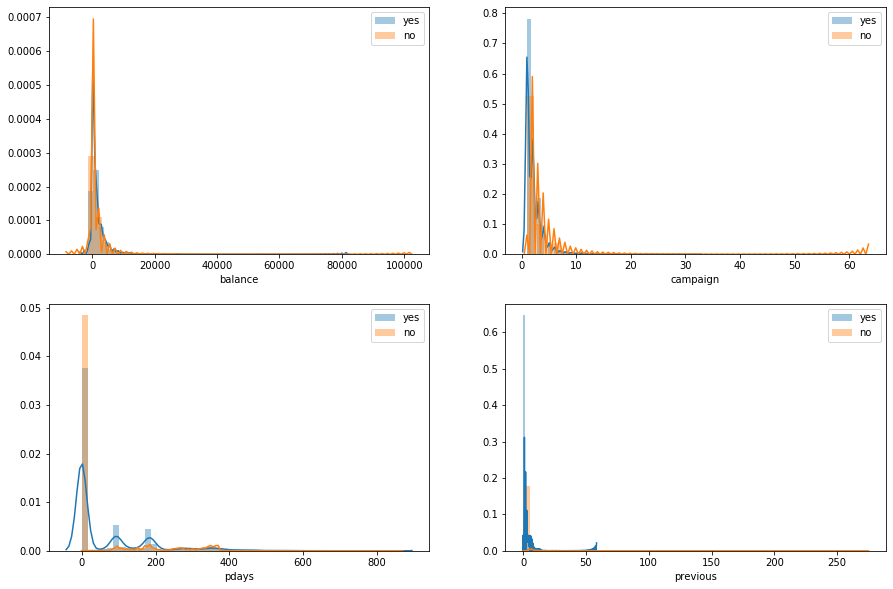

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.distplot(data1['balance'],kde=True)
sns.distplot(data2['balance'],kde=True)
plt.legend(['yes','no'])

plt.subplot(2, 2, 2)
sns.distplot(data1['campaign'],kde=True)
sns.distplot(data2['campaign'],kde=True)
plt.legend(['yes','no'])

plt.subplot(2, 2, 3)
sns.distplot(data1['pdays'],kde=True)
sns.distplot(data2['pdays'],kde=True)
plt.legend(['yes','no'])

plt.subplot(2, 2, 4)
sns.distplot(data1['previous'],kde=True)
sns.distplot(data2['previous'],kde=True)
plt.legend(['yes','no'])

## 特徵工程

In [43]:
y=data.y
y.replace(('yes','no'),(1,0),inplace=True)

### 連續資料做PCA

In [44]:
def data_continous(data):
    
    # 正歸化
    col_names=['age','balance','day','campaign','pdays','previous','duration']
    features=data[col_names]
    normalizer=Normalizer(norm="max")
    features=normalizer.fit_transform(features.values)
    data[col_names]=features
    
    for i in categorical_variable:
        data=data.drop([i],axis=1)
    
    
    
    return data

In [45]:
data_continous=data_continous(data).drop(['y'],axis=1)
data_continous

,age,balance,day,duration,campaign,pdays,previous
0,0.027065,1.000000,0.002333,0.121792,0.000467,-0.000467,0.000000
1,0.291391,0.192053,0.033113,1.000000,0.006623,-0.006623,0.000000
2,0.434211,0.026316,0.065789,1.000000,0.013158,-0.013158,0.000000
3,0.031208,1.000000,0.003320,0.061089,0.000664,-0.000664,0.000000
4,0.166667,0.005051,0.025253,1.000000,0.005051,-0.005051,0.000000
...,...,...,...,...,...,...,...
45206,0.052201,0.844422,0.017400,1.000000,0.003071,-0.001024,0.000000
45207,0.041064,1.000000,0.009832,0.263736,0.001157,-0.000578,0.000000
45208,0.012598,1.000000,0.002975,0.197200,0.000875,0.032196,0.000525
45209,0.085329,1.000000,0.025449,0.760479,0.005988,-0.001497,0.000000


In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components='mle',whiten=True)
x_pca=pca.fit_transform(data_continous)

<Figure size 1080x720 with 0 Axes>

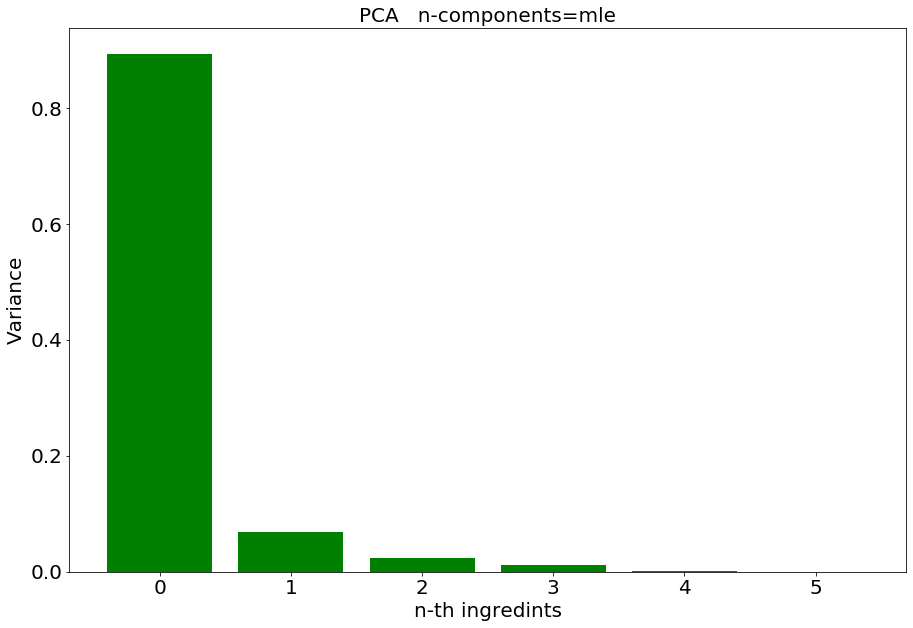

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(15,10))
ratio=pca.explained_variance_ratio_
n=len(ratio)

plt.figure(figsize=(15,10))
plt.title('PCA   n-components=mle',fontsize=20)
plt.bar(range(6),ratio,color='g')
plt.xticks(range(6))
plt.xlabel('n-th ingredints',fontsize=20)
plt.ylabel('Variance',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.savefig('pca')


* 從七個數值型參數降維成六個

### 類別資料做one-hot encoding

In [48]:
def data_categorical(data):

    # 刪除 'default'
    for i in numerical_variable:
        data=data.drop([i],axis=1)
    data=data.drop(['y'],axis=1)
    data=data.drop(['default'],axis=1)
    #類別資料編碼
    data=pd.get_dummies(data)
    
    return data

In [49]:
data_categorical=data_categorical(data)
data_categorical

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### 合併處理完的資料

In [50]:
x_pca=pd.DataFrame(x_pca)
X= pd.concat([x_pca,data_categorical], axis=1)
X

,0,1,2,3,4,5,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.379801,0.902195,-0.324718,0.168682,-0.142454,0.029142,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.291675,-1.224633,-0.348611,-0.148100,-1.714774,0.364327,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.418551,-1.239957,-0.426713,-0.982725,-2.414745,0.270723,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.384672,1.056899,-0.333221,0.072590,-0.181750,0.001331,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.422239,-1.106924,-0.303451,0.610012,-0.729862,0.338900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.192268,-1.328318,-0.248181,1.048774,0.188272,0.312292,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,-0.367249,0.528177,-0.316298,0.236165,-0.089545,0.030937,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,-0.374025,0.714528,-0.169201,0.317136,0.034181,0.059349,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,-0.323709,-0.776821,-0.285940,0.524358,-0.029730,0.232490,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## 資料增量

### 使用 StratifiedShuffleSplit 進行資料劃分

* 可以保證資料每一資料組y的yes,no比例相等
* 將資料隨機分組，再取指定的比例分成訓練資料集跟驗證資料集

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(n_estimators=35),
               'K Nearest Neighbour':KNeighborsClassifier(7),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(probability=True),}

In [53]:
data_y = pd.DataFrame(data['y'])
data_X = X
print(data_X.columns)
log_cols = ["Classifier","Precision Score","Recall Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

Index([                    0,                     1,                     2,
                           3,                     4,                     5,
                'job_admin.',     'job_blue-collar',    'job_entrepreneur',
             'job_housemaid',      'job_management',         'job_retired',
         'job_self-employed',        'job_services',         'job_student',
            'job_technician',      'job_unemployed',         'job_unknown',
          'marital_divorced',     'marital_married',      'marital_single',
         'education_primary', 'education_secondary',  'education_tertiary',
         'education_unknown',          'housing_no',         'housing_yes',
                   'loan_no',            'loan_yes',    'contact_cellular',
         'contact_telephone',     'contact_unknown',           'month_apr',
                 'month_aug',           'month_dec',           'month_feb',
                 'month_jan',           'month_jul',           'month_jun',
            

* smote方法把類別資料yes拉到跟no數量一樣多

In [54]:
sm = SMOTE(random_state=0)
import warnings
warnings.filterwarnings('ignore')

table1 = pt.PrettyTable()
table1.field_names=['algorithm','True Negative', 'False Posotive', 'False Negative', 'True Positive']

rs = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(data_X,data_y)
rs.get_n_splits(X_SMOTE, y_SMOTE)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(X_SMOTE, y_SMOTE):
        X_train,X_test = X_SMOTE.iloc[train_index], X_SMOTE.iloc[test_index]
        y_train,y_test = y_SMOTE.iloc[train_index], y_SMOTE.iloc[test_index]
        cls = classify
        cls =cls.fit(X_train,y_train)
        y_out = cls.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test,y_out).ravel()
        table1.add_row( [Name,tn, fp, fn, tp] )
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        fpr,tpr,thresholds=roc_curve(y_test,y_out)
        ROC=auc(fpr,tpr)
        log_entry = pd.DataFrame([[Name,precision,recall,ROC]], columns=log_cols)
        log = log.append(log_entry)
    table1.add_row( [Name,tn, fp, fn, tp] )
    
table1.align = 'c'
table1.set_style(pt.PLAIN_COLUMNS)
print(table1)

           algorithm                   True Negative        False Posotive        False Negative        True Positive        
  Gradient Boosting Classifier              6608                 1377                  758                   7226            
  Gradient Boosting Classifier              6608                 1377                  758                   7226            
  Adaptive Boosting Classifier              6611                 1374                  1088                  6896            
  Adaptive Boosting Classifier              6611                 1374                  1088                  6896            
  Linear Discriminant Analysis              7355                 630                   1607                  6377            
  Linear Discriminant Analysis              7355                 630                   1607                  6377            
      Logistic Regression                   7219                 766                   1068                  6916     

                        Classifier  Precision Score  Recall Score  \
0     Gradient Boosting Classifier         0.868517      0.866306   
0     Adaptive Boosting Classifier         0.846270      0.845827   
0     Linear Discriminant Analysis         0.865389      0.859912   
0              Logistic Regression         0.885705      0.885151   
0         Random Forest Classifier         0.931115      0.928677   
0              K Nearest Neighbour         0.888625      0.875389   
0         Decision Tree Classifier         0.887136      0.886782   
0  Gaussian Naive Bayes Classifier         0.723021      0.722339   
0        Support Vector Classifier         0.910943      0.910890   

   roc-auc_Score  
0       0.866306  
0       0.845827  
0       0.859912  
0       0.885151  
0       0.928677  
0       0.875389  
0       0.886782  
0       0.722339  
0       0.910890  


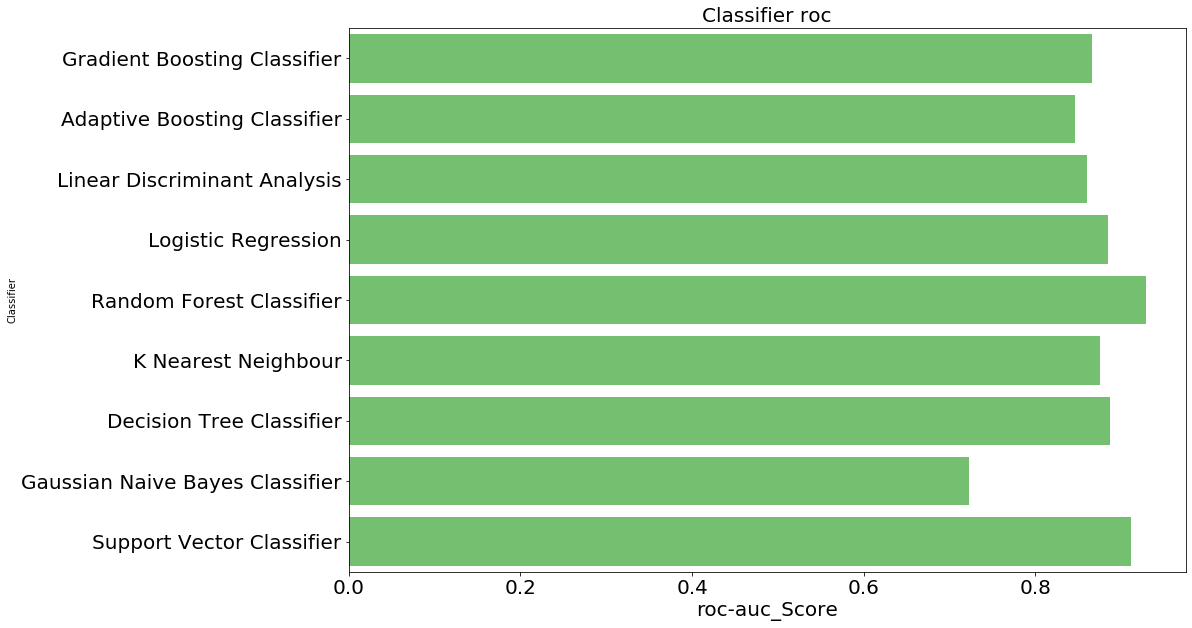

In [55]:
print(log)
plt.figure(figsize=(15,10))
plt.xlabel('Accuracy',fontsize=20)
plt.title('Classifier roc',fontsize=20)
sns.set_color_codes("muted")
sns.barplot(x='roc-auc_Score', y='Classifier', data=log, color="g")  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* 我們找很多分類模型去進行比較，最後發現隨機森林所得到的結果是最好的
* 藉由上表的結果，我們決定更精進隨機森林的模型以得到更好的結果

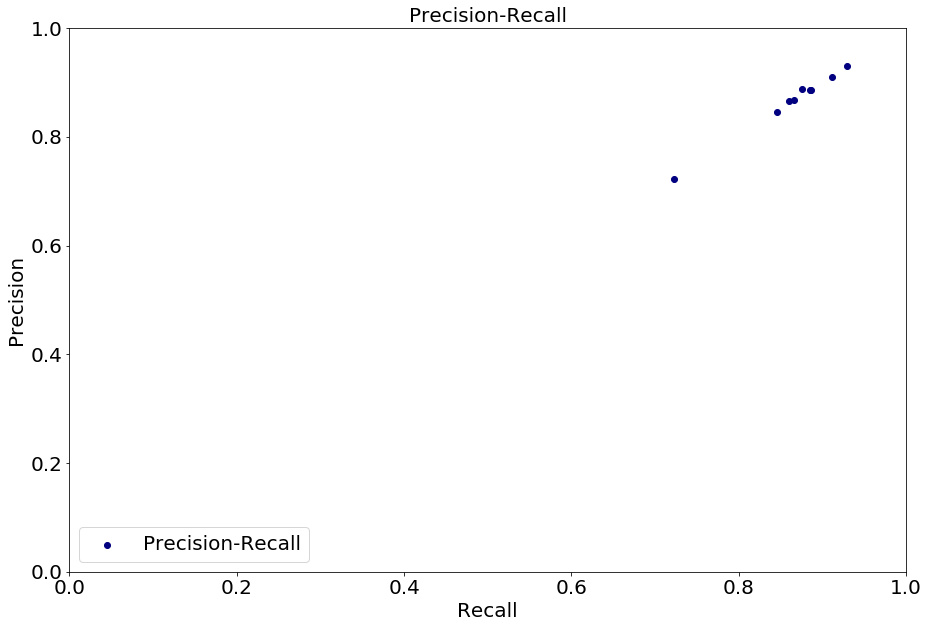

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(log['Recall Score'], log['Precision Score'], color='navy',
         label='Precision-Recall')
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall',fontsize=20)
plt.legend(loc="lower left",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


## 用隨機森林與決策樹評估資料增量的成效

In [57]:
data_=load_data()
y=data_.y
data_=data_.drop(['y'],axis=1)
data_=data_.drop(['default'],axis=1)
x=data_
x

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,0.027065,4,0,2,1.000000,1,0,2,0.002333,4,0.000467,-0.000467,0.000000,3
1,1.000000,9,1,1,0.659091,1,0,2,0.113636,4,0.022727,-0.022727,0.000000,3
2,1.000000,2,0,1,0.060606,1,1,2,0.151515,4,0.030303,-0.030303,0.000000,3
3,0.031208,1,0,3,1.000000,1,0,2,0.003320,4,0.000664,-0.000664,0.000000,3
4,1.000000,11,1,3,0.030303,0,0,2,0.151515,4,0.030303,-0.030303,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.061818,9,0,2,1.000000,0,0,1,0.020606,10,0.003636,-0.001212,0.000000,3
45207,0.041064,5,2,0,1.000000,0,0,1,0.009832,10,0.001157,-0.000578,0.000000,3
45208,0.012598,5,0,1,1.000000,0,0,1,0.002975,10,0.000875,0.032196,0.000525,2
45209,0.085329,1,0,1,1.000000,0,0,0,0.025449,10,0.005988,-0.001497,0.000000,3


In [58]:
sm = SMOTE(random_state=0)
table1 = pt.PrettyTable()
table1.field_names=['algorithm','precision','recall',"ROC"]

X_SMOTE, y_SMOTE = sm.fit_resample(x,y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2,random_state=0)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
precision=precision_score(y_test, y_pred,average='binary')
recall=recall_score(y_test, y_pred,average='binary')
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
ROC=auc(fpr,tpr)
table1.add_row( ["Decision Tree (smote)",precision,recall,ROC ] )

rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
precision=precision_score(y_test, y_pred,average='binary')
recall=recall_score(y_test, y_pred,average='binary')
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
ROC=auc(fpr,tpr)
table1.add_row( ["Random Forest (smote)",precision,recall,ROC ] )

### 在隨機森林中找重要的特徵

<Figure size 1080x720 with 0 Axes>

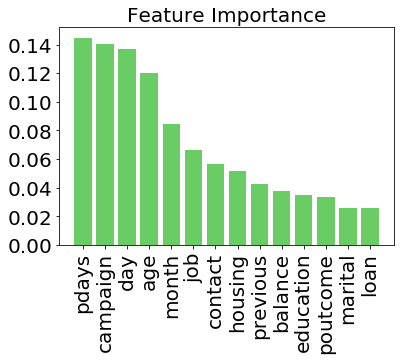

In [59]:
importances=rfc.feature_importances_
indices=np.argsort(importances)[::-1]
names=[x.columns[i]for i in indices]

plt.figure(figsize=(15,10))
plt.figure()
plt.title('Feature Importance',fontsize=20)
plt.bar(range(x.shape[1]),importances[indices],color='g')
plt.xticks(range(x.shape[1]),names,rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
precision=precision_score(y_test, y_pred,average='binary')
recall=recall_score(y_test, y_pred,average='binary')
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
ROC=auc(fpr,tpr)
table1.add_row( ["Decision Tree",precision,recall,ROC ] )

rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
precision=precision_score(y_test, y_pred,average='binary')
recall=recall_score(y_test, y_pred,average='binary')
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
ROC=auc(fpr,tpr)
table1.add_row( ["Random Forest",precision,recall,ROC ] )



table1.align = 'c'
table1.set_style(pt.PLAIN_COLUMNS)
print(table1)

      algorithm                  precision                    recall                     ROC                
Decision Tree (smote)        0.7756855360715547         0.816931085770947         0.787847899549187         
Random Forest (smote)        0.863658596233798          0.8754338125929598        0.8671562177760394        
    Decision Tree            0.2852173913043478         0.3085606773283161        0.6027765792656617        
    Random Forest            0.5942028985507246        0.19285042333019756        0.5876532818405373        


### 挑選出隨機森林樹的最適數量

In [61]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(x,y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.33,random_state=0)

nb_classifications=50
roc=[]

for i in range(1,nb_classifications):
    rfc=RandomForestClassifier(n_estimators=i,random_state=0)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    fpr,tpr,thresholds=roc_curve(y_test, y_pred)
    ROC=auc(fpr,tpr)
    roc.append(ROC)

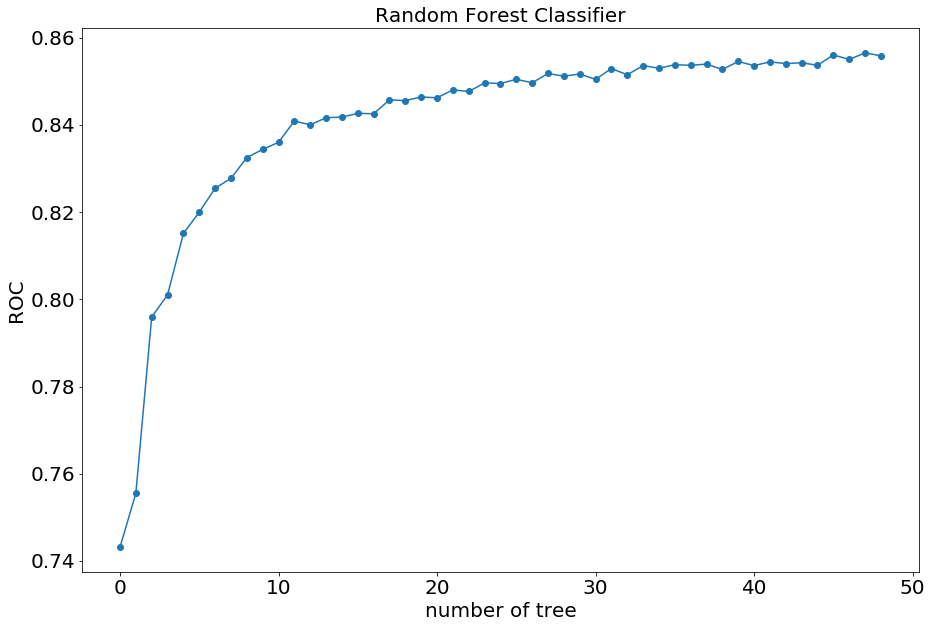

In [62]:
plt.figure(figsize=(15,10))
plt.plot(roc,'-o')
plt.xlabel('number of tree',fontsize=20)
plt.ylabel('ROC',fontsize=20)
plt.title('Random Forest Classifier',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* 決策樹的數量小於最小門檻，ROC值很低
* 樹的數量介於30 ~ 40棵樹時已經可以產生最佳的結果(約85%)

In [80]:
classifiers = {'Random Forest Classifier': RandomForestClassifier(n_estimators=35),}
data_y = pd.DataFrame(data['y'])
data_X = X

sm = SMOTE(random_state=0)
import warnings
warnings.filterwarnings('ignore')

rs = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(data_X,data_y)
rs.get_n_splits(X_SMOTE, y_SMOTE)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(X_SMOTE, y_SMOTE):
        X_train,X_test = X_SMOTE.iloc[train_index], X_SMOTE.iloc[test_index]
        y_train,y_test = y_SMOTE.iloc[train_index], y_SMOTE.iloc[test_index]
        cls = classify
        cls =cls.fit(X_train,y_train)
        y_out = cls.predict(X_test)


confusion matrix

                    判斷為陰性        判斷為陽性        
實際上為陰性           7083              902            
實際上為陽性           262               7722           
----------------------------------------------------------
 
分類度量
                                    
      f1 score:         0.93        
  recall score:        0.967        
precision score        0.895        
----------------------------------------------------------
 
ROC: 0.9271112826780674


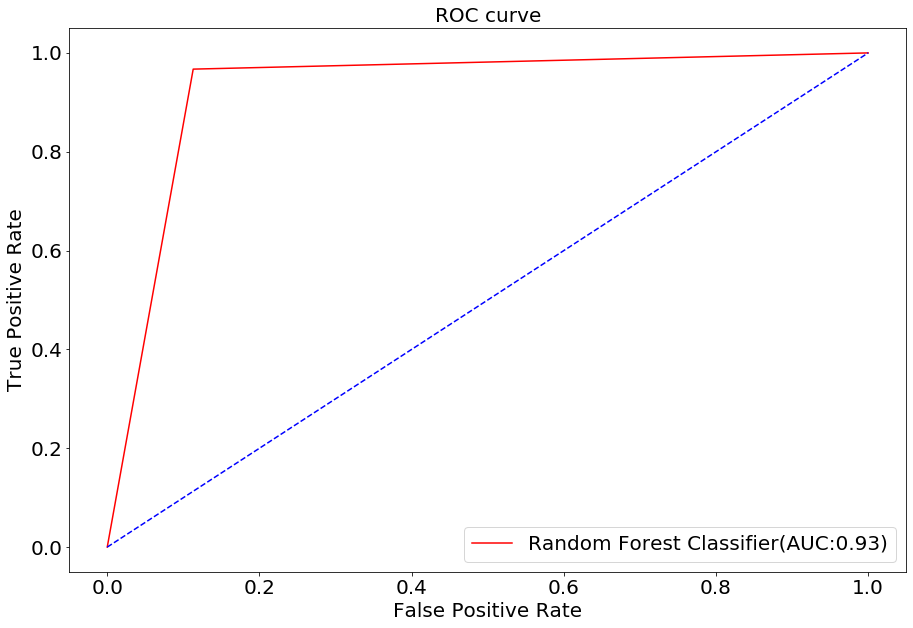

In [81]:
evaluation(X_train,y_train,X_test,y_test,y_out,Name)

## 使用keras建立neural network

In [84]:
data_y = pd.DataFrame(data['y'])
data_X = X
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(data_X,data_y)

In [85]:
n,p=data_X.shape
model = tf.keras.Sequential(name='Bank_Marketing')
model.add(layers.Dense(100, activation='relu', input_shape=(p,)))
model.add(layers.Dense(16, activation='relu', input_shape=(p,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "Bank_Marketing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4900      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
Total params: 6,550
Trainable params: 6,550
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(tf.keras.optimizers.Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2,random_state=0)

In [88]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=None, epochs=500, verbose=0)
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

(array([0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98]),
 <a list of 8 Text yticklabel objects>)

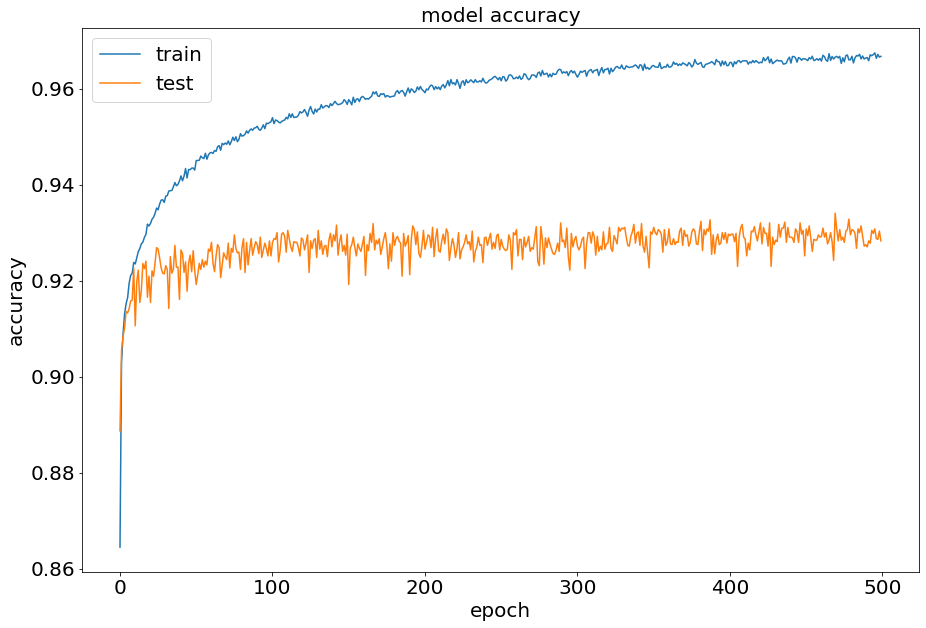

In [89]:
plt.figure(figsize=(15,10))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.title('model accuracy',fontsize=20)
plt.legend(['train', 'test'], loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

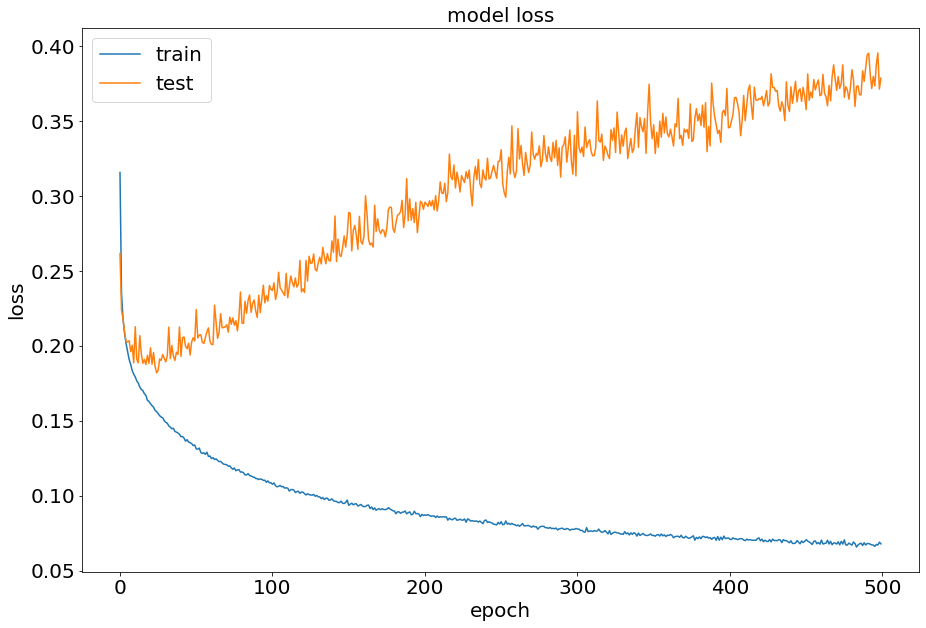

In [90]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('model loss',fontsize=20)
plt.legend(['train', 'test'], loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

* 大約epoch＝50時為甜蜜點(sweet spot)，之後測試誤差越來越大，模型漸漸開始過擬合。

## Evaluate the artificial neural network

In [91]:
model.evaluate(X_train,y_train, verbose=0)

[0.09508002232802475, 0.9639609]

In [92]:
model.evaluate(X_test,y_test, verbose=0)

[0.4023190377981532, 0.923602]

In [93]:
y_pr=model.predict(X_test)
y_pre=np.ones(len(y_pr))
for i in range(len(y_pr)):
    if y_pr[i][0]>=y_pr[i][1]:
        y_pre[i]=0
    else:
        y_pre[i]=1

## 演算法評估

confusion matrix

                    判斷為陰性        判斷為陽性        
實際上為陰性           7129              772            
實際上為陽性           448               7620           
----------------------------------------------------------
 
分類度量
                                    
      f1 score:        0.926        
  recall score:        0.944        
precision score        0.908        
----------------------------------------------------------
 
ROC: 0.9233814186803638


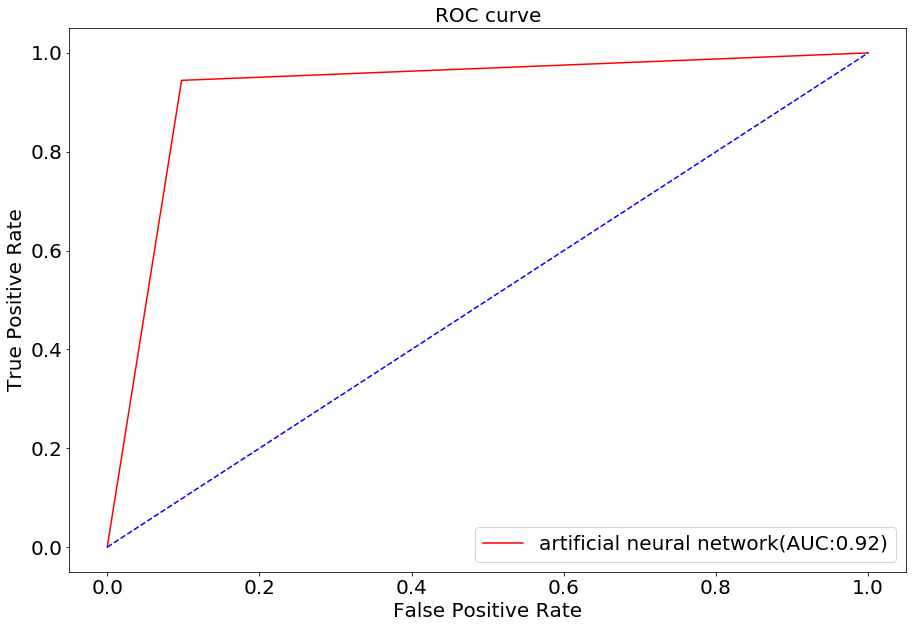

In [94]:
evaluation(X_train,y_train,X_test,y_test,y_pre,'artificial neural network')

* 隨機森林或類神經網路效果都很不錯

## 結論

* 解釋性的分類模型當中隨機森林表現最好
* pdays,campaign,day,age是判斷客戶是否加入定存的重要特徵
* 模型告訴我們不管是營銷期間或是之後都要積極的跟客戶推銷，可提高客戶加入定存的意願
* 此結果呼應了之前對age變數的KDE圖形觀察，客戶年紀對於是否加入定存有很重要的影響
* 若要觀察自己的分類模型是否有過擬合現象，類神經網路模型是個不錯的選擇
* 本次分析中表現最差的分類模型是Gaussian Naive Bayes Classifier

## 資料來源

* https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Reference 

* https://github.com/jinudaniel/bank-marketing-analysis/blob/master/bank_marketing.ipynb
* https://github.com/mcabinaya/Bank-Marketing-Data-Analysis
* https://www.kaggle.com/mayurjain/ml-bank-marketing-solution
* https://medium.com/@sardina.aleigha/bank-marketing-a-classification-exercise-fd9b77a1da4d
* https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit
* https://www.kaggle.com/suhasshastry/bank-marketing-analysis-for-term-deposit